In [2]:
import pandas as pd
import sqlite3

## 1

In [3]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## 2

In [4]:
views = pd.io.sql.read_sql(
    """
    SELECT uid, datetime
    FROM pageviews
    WHERE uid LIKE "user_%"
    """,
    con=conn
)

views['datetime'] = pd.to_datetime(views['datetime']).apply(lambda r: r.date())
views = views.rename(columns={'datetime': 'date'})
views = views.groupby(by=['date'])['date'].count().to_frame()
views = views.rename(columns={'date': 'views'}).reset_index()

In [5]:
commits = pd.io.sql.read_sql(
    """
    SELECT uid, timestamp
    FROM checker
    WHERE uid LIKE "user_%"
    """,
    con=conn
)

commits['timestamp'] = pd.to_datetime(commits['timestamp']).apply(lambda r: r.date())
commits = commits.rename(columns={'timestamp': 'date'})
commits = commits.groupby(by=['date'])['date'].count().to_frame()
commits = commits.rename(columns={'date': 'commits'}).reset_index()

In [22]:
df = views.merge(commits, on='date', how='inner')
df = df.set_index('date')

<Axes: title={'center': 'Views and commits per day'}, xlabel='date'>

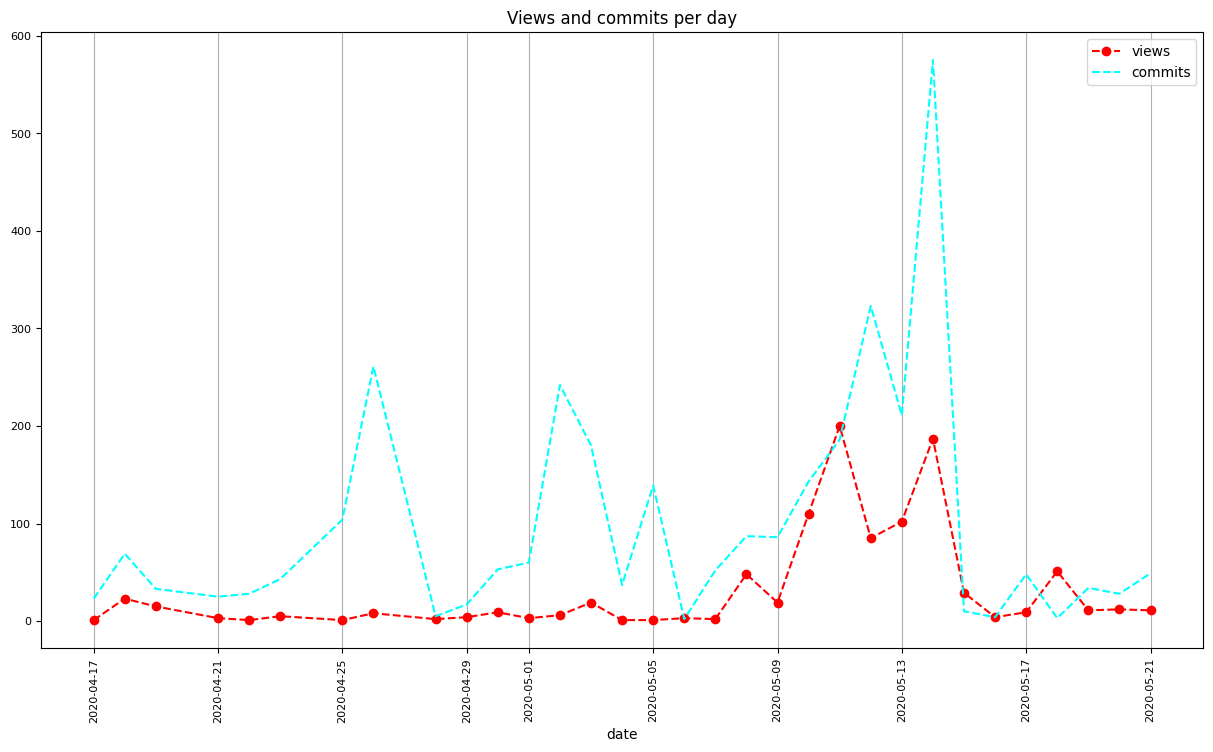

In [29]:
plt = df.plot(title='Views and commits per day', fontsize=8, figsize=(15, 8), rot=90,
        color=['red', 'cyan'], style=['--o', '--'], grid=True)
plt.yaxis.grid(False)
plt

## 3

How many times was the number of views larger than 150? The answer is 2.